In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Marek\Downloads\houses_to_rent.csv')

In [3]:
df

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,6075,1,50,2,1,1,2,acept,not furnished,R$420,"R$1,150",R$0,R$15,"R$1,585"
6076,6076,1,84,2,2,1,16,not acept,furnished,R$768,"R$2,900",R$63,R$37,"R$3,768"
6077,6077,0,48,1,1,0,13,acept,not furnished,R$250,R$950,R$42,R$13,"R$1,255"
6078,6078,1,160,3,2,2,-,not acept,not furnished,R$0,"R$3,500",R$250,R$53,"R$3,803"


In [4]:
df = df.drop(['Unnamed: 0'], axis=1)

In [5]:
df.shape

(6080, 13)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(5882, 13)

In [8]:
df.isnull().sum()

city              0
area              0
rooms             0
bathroom          0
parking spaces    0
floor             0
animal            0
furniture         0
hoa               0
rent amount       0
property tax      0
fire insurance    0
total             0
dtype: int64

In [9]:
df.nunique()

city                 2
area               435
rooms                9
bathroom            10
parking spaces      10
floor               37
animal               2
furniture            2
hoa               1292
rent amount       1032
property tax      1036
fire insurance     190
total             4069
dtype: int64

In [10]:
df.describe()

,city,area,rooms,bathroom,parking spaces
count,5882.000000,5882.000000,5882.000000,5882.000000,5882.000000
mean,0.865352,154.494390,2.528052,2.377763,1.799728
std,0.341376,381.295055,1.124299,1.443171,1.615585
min,0.000000,10.000000,1.000000,1.000000,0.000000
25%,1.000000,60.000000,2.000000,1.000000,1.000000
50%,1.000000,100.000000,3.000000,2.000000,1.000000
75%,1.000000,200.000000,3.000000,3.000000,3.000000
max,1.000000,24606.000000,10.000000,10.000000,12.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5882 entries, 0 to 6079
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            5882 non-null   int64 
 1   area            5882 non-null   int64 
 2   rooms           5882 non-null   int64 
 3   bathroom        5882 non-null   int64 
 4   parking spaces  5882 non-null   int64 
 5   floor           5882 non-null   object
 6   animal          5882 non-null   object
 7   furniture       5882 non-null   object
 8   hoa             5882 non-null   object
 9   rent amount     5882 non-null   object
 10  property tax    5882 non-null   object
 11  fire insurance  5882 non-null   object
 12  total           5882 non-null   object
dtypes: int64(5), object(8)
memory usage: 459.5+ KB


In [12]:
df['floor'].value_counts()

-     1497
1      536
3      384
2      369
4      306
5      302
6      295
8      288
7      284
9      222
10     209
11     191
12     175
13     142
14     140
15     107
16      88
17      72
18      69
19      47
20      35
21      30
22      21
23      18
25      14
24      11
27       7
28       6
26       6
29       4
99       1
32       1
68       1
85       1
31       1
35       1
51       1
Name: floor, dtype: int64

In [13]:
df['floor'] = df['floor'].replace('-',np.nan)
df['floor']= df['floor'].fillna(df['floor'].median()).astype('int')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5882 entries, 0 to 6079
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            5882 non-null   int64 
 1   area            5882 non-null   int64 
 2   rooms           5882 non-null   int64 
 3   bathroom        5882 non-null   int64 
 4   parking spaces  5882 non-null   int64 
 5   floor           5882 non-null   int32 
 6   animal          5882 non-null   object
 7   furniture       5882 non-null   object
 8   hoa             5882 non-null   object
 9   rent amount     5882 non-null   object
 10  property tax    5882 non-null   object
 11  fire insurance  5882 non-null   object
 12  total           5882 non-null   object
dtypes: int32(1), int64(5), object(7)
memory usage: 459.5+ KB


In [15]:
df['animal'].value_counts()

acept        4535
not acept    1347
Name: animal, dtype: int64

In [16]:
df['furniture'].value_counts()

not furnished    4349
furnished        1533
Name: furniture, dtype: int64

In [17]:
import re
df['total'] = df['total'].map(lambda x: re.sub(r'\D+', '', x))
df['hoa'] = df['hoa'].map(lambda x: re.sub(r'\D+', '', x))
df['rent amount'] = df['rent amount'].map(lambda x: re.sub(r'\D+', '', x))
df['fire insurance'] = df['fire insurance'].map(lambda x: re.sub(r'\D+', '', x))
df['property tax'] = df['property tax'].map(lambda x: re.sub(r'\D+', '', x))

In [18]:
df_new = df.copy()

In [19]:
df_new.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,7,acept,furnished,0,8000,1000,121,9121
1,0,64,2,1,1,10,acept,not furnished,540,820,122,11,1493
2,1,443,5,5,4,3,acept,furnished,4172,7000,1417,89,12680
3,1,73,2,2,1,12,acept,not furnished,700,1250,150,16,2116
4,1,19,1,1,0,7,not acept,not furnished,0,1200,41,16,1257


In [20]:
df_new['animal'] = df_new['animal'].map({'acept':'Yes','not acept':'No'})

In [21]:
df_new['furniture'] = df_new['furniture'].map({'not furnished':'No','furnished':'Yes'})

In [22]:
df_new.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,7,Yes,Yes,0,8000,1000,121,9121
1,0,64,2,1,1,10,Yes,No,540,820,122,11,1493
2,1,443,5,5,4,3,Yes,Yes,4172,7000,1417,89,12680
3,1,73,2,2,1,12,Yes,No,700,1250,150,16,2116
4,1,19,1,1,0,7,No,No,0,1200,41,16,1257


In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
la = LabelEncoder()
df_new['animal'] = la.fit_transform(df['animal'])
df_new['furniture'] =la.fit_transform(df['furniture'])

In [25]:
df_new.describe()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture
count,5882.000000,5882.000000,5882.000000,5882.000000,5882.000000,5882.000000,5882.000000,5882.000000
mean,0.865352,154.494390,2.528052,2.377763,1.799728,7.483509,0.229004,0.739374
std,0.341376,381.295055,1.124299,1.443171,1.615585,5.164871,0.420227,0.439013
min,0.000000,10.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,60.000000,2.000000,1.000000,1.000000,4.000000,0.000000,0.000000
50%,1.000000,100.000000,3.000000,2.000000,1.000000,7.000000,0.000000,1.000000
75%,1.000000,200.000000,3.000000,3.000000,3.000000,9.000000,0.000000,1.000000
max,1.000000,24606.000000,10.000000,10.000000,12.000000,99.000000,1.000000,1.000000


In [26]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5882 entries, 0 to 6079
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            5882 non-null   int64 
 1   area            5882 non-null   int64 
 2   rooms           5882 non-null   int64 
 3   bathroom        5882 non-null   int64 
 4   parking spaces  5882 non-null   int64 
 5   floor           5882 non-null   int32 
 6   animal          5882 non-null   int32 
 7   furniture       5882 non-null   int32 
 8   hoa             5882 non-null   object
 9   rent amount     5882 non-null   object
 10  property tax    5882 non-null   object
 11  fire insurance  5882 non-null   object
 12  total           5882 non-null   object
dtypes: int32(3), int64(5), object(5)
memory usage: 459.5+ KB


In [27]:
df_new['hoa'] = pd.to_numeric(df_new['hoa'])
df_new['rent amount'] = pd.to_numeric(df_new['rent amount'])
df_new['property tax'] = pd.to_numeric(df_new['property tax'])
df_new['fire insurance'] = pd.to_numeric(df_new['fire insurance'])
df_new['total'] = pd.to_numeric(df_new['total'])

#pd.to_numeric(s, errors='coerce')
#df["total"] = pd.to_numeric(df["total"].apply(remove_dollor), errors= "ignore")

In [28]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5882 entries, 0 to 6079
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            5882 non-null   int64  
 1   area            5882 non-null   int64  
 2   rooms           5882 non-null   int64  
 3   bathroom        5882 non-null   int64  
 4   parking spaces  5882 non-null   int64  
 5   floor           5882 non-null   int32  
 6   animal          5882 non-null   int32  
 7   furniture       5882 non-null   int32  
 8   hoa             5686 non-null   float64
 9   rent amount     5882 non-null   int64  
 10  property tax    5855 non-null   float64
 11  fire insurance  5882 non-null   int64  
 12  total           5882 non-null   int64  
dtypes: float64(2), int32(3), int64(8)
memory usage: 574.4 KB


In [29]:
df_new.describe()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
count,5882.000000,5882.000000,5882.000000,5882.000000,5882.000000,5882.000000,5882.000000,5882.000000,5686.000000,5882.000000,5855.000000,5882.000000,5882.000000
mean,0.865352,154.494390,2.528052,2.377763,1.799728,7.483509,0.229004,0.739374,1144.937390,4479.392724,506.650384,59.316049,6150.218293
std,0.341376,381.295055,1.124299,1.443171,1.615585,5.164871,0.420227,0.439013,4108.649819,3601.273801,6330.234201,49.691101,8868.503973
min,0.000000,10.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,420.000000,0.000000,3.000000,660.000000
25%,1.000000,60.000000,2.000000,1.000000,1.000000,4.000000,0.000000,0.000000,250.000000,1881.000000,35.000000,23.000000,2496.000000
50%,1.000000,100.000000,3.000000,2.000000,1.000000,7.000000,0.000000,1.000000,700.000000,3200.000000,158.000000,42.000000,4247.000000
75%,1.000000,200.000000,3.000000,3.000000,3.000000,9.000000,0.000000,1.000000,1500.000000,6000.000000,473.000000,79.000000,8216.750000
max,1.000000,24606.000000,10.000000,10.000000,12.000000,99.000000,1.000000,1.000000,220000.000000,45000.000000,366300.000000,677.000000,372700.000000


In [30]:
df_new.corr()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
city,1.000000,0.007780,0.041741,0.090837,0.033108,0.091226,0.031258,-0.101450,0.044570,0.210036,0.021538,0.192221,0.121072
area,0.007780,1.000000,0.262737,0.271482,0.247998,0.023319,-0.063883,0.020908,0.043277,0.232098,0.032025,0.243643,0.137953
rooms,0.041741,0.262737,1.000000,0.741614,0.615886,0.029728,-0.202007,0.084920,0.128176,0.526743,0.043043,0.550190,0.304456
bathroom,0.090837,0.271482,0.741614,1.000000,0.680284,0.102716,-0.151923,-0.020367,0.153809,0.651425,0.063808,0.661196,0.382461
parking spaces,0.033108,0.247998,0.615886,0.680284,1.000000,0.098743,-0.162105,-0.004559,0.099770,0.569515,0.041342,0.595409,0.307393
floor,0.091226,0.023319,0.029728,0.102716,0.098743,1.000000,0.019799,-0.086674,0.033678,0.152927,0.022564,0.131312,0.094907
animal,0.031258,-0.063883,-0.202007,-0.151923,-0.162105,0.019799,1.000000,-0.076443,-0.018879,-0.093837,0.023997,-0.104912,-0.031144
furniture,-0.101450,0.020908,0.084920,-0.020367,-0.004559,-0.086674,-0.076443,1.000000,-0.040721,-0.164811,-0.012733,-0.134312,-0.096076
hoa,0.044570,0.043277,0.128176,0.153809,0.099770,0.033678,-0.018879,-0.040721,1.000000,0.193396,0.016324,0.165873,0.547311
rent amount,0.210036,0.232098,0.526743,0.651425,0.569515,0.152927,-0.093837,-0.164811,0.193396,1.000000,0.057074,0.985698,0.538725


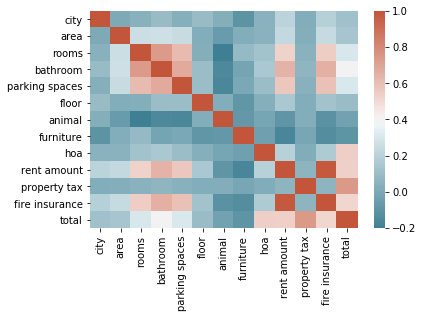

In [31]:
corr = df_new.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [32]:
Q1 = df_new.quantile(0.25)
Q3 = df_new.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

city                 0.00
area               140.00
rooms                1.00
bathroom             2.00
parking spaces       2.00
floor                5.00
animal               0.00
furniture            1.00
hoa               1250.00
rent amount       4119.00
property tax       438.00
fire insurance      56.00
total             5720.75
dtype: float64


In [33]:
print(df_new < (Q1 - 1.5 * IQR)) |(df_new > (Q3 + 1.5 * IQR))

       city   area  rooms  bathroom  parking spaces  floor  animal  furniture  \
0     False  False  False     False           False  False   False      False   
1      True  False  False     False           False  False   False      False   
2     False  False  False     False           False  False   False      False   
3     False  False  False     False           False  False   False      False   
4     False  False  False     False           False  False   False      False   
...     ...    ...    ...       ...             ...    ...     ...        ...   
6075  False  False  False     False           False  False   False      False   
6076  False  False  False     False           False  False   False      False   
6077   True  False  False     False           False  False   False      False   
6078  False  False  False     False           False  False   False      False   
6079  False  False  False     False           False  False   False      False   

        hoa  rent amount  p

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [34]:
print(df_new['area'].skew())
df_new['area'].describe()

51.045447874114814


count     5882.000000
mean       154.494390
std        381.295055
min         10.000000
25%         60.000000
50%        100.000000
75%        200.000000
max      24606.000000
Name: area, dtype: float64

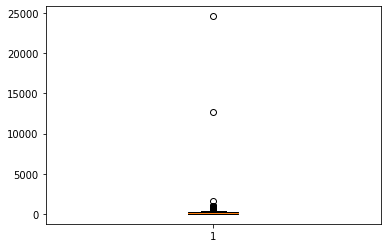

In [35]:
plt.boxplot(df_new['area'])
plt.show()

In [36]:
print(df_new['hoa'].skew())
df_new['hoa'].describe()

46.59829689980884


count      5686.000000
mean       1144.937390
std        4108.649819
min           0.000000
25%         250.000000
50%         700.000000
75%        1500.000000
max      220000.000000
Name: hoa, dtype: float64

C:\Users\Marek\Nowy folder\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\Marek\Nowy folder\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\Marek\Nowy folder\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\Marek\Nowy folder\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


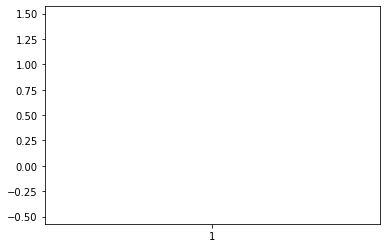

In [37]:
plt.boxplot(df_new['hoa'])
plt.show()

In [38]:
print(df_new['rent amount'].skew())
df_new['rent amount'].describe()

1.6077493038739246


count     5882.000000
mean      4479.392724
std       3601.273801
min        420.000000
25%       1881.000000
50%       3200.000000
75%       6000.000000
max      45000.000000
Name: rent amount, dtype: float64

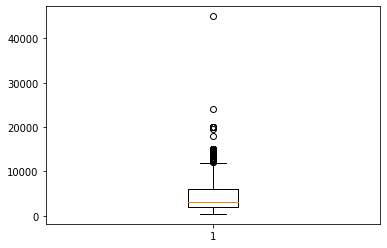

In [39]:
plt.boxplot(df_new['rent amount'])
plt.show()

In [40]:
print(df_new['property tax'].skew())
df_new['property tax'].describe()

53.672580123802476


count      5855.000000
mean        506.650384
std        6330.234201
min           0.000000
25%          35.000000
50%         158.000000
75%         473.000000
max      366300.000000
Name: property tax, dtype: float64

C:\Users\Marek\Nowy folder\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\Marek\Nowy folder\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\Marek\Nowy folder\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\Marek\Nowy folder\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


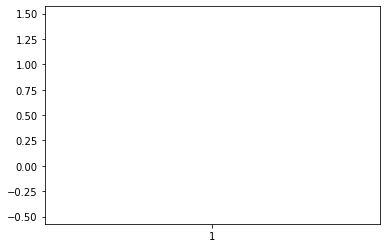

In [41]:
plt.boxplot(df_new['property tax'])
plt.show()

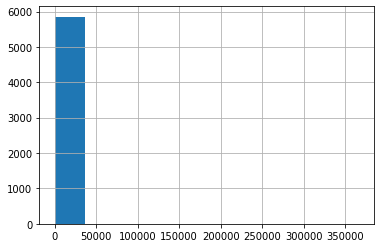

In [42]:
df_new['property tax'].hist()

In [43]:
print(df_new['fire insurance'].skew())
df_new['fire insurance'].describe()

1.6980906844106722


count    5882.000000
mean       59.316049
std        49.691101
min         3.000000
25%        23.000000
50%        42.000000
75%        79.000000
max       677.000000
Name: fire insurance, dtype: float64

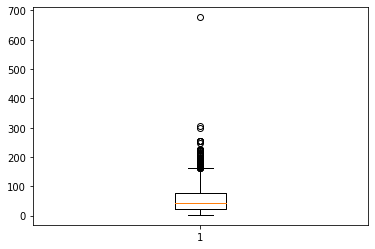

In [44]:
plt.boxplot(df_new['fire insurance'])
plt.show()


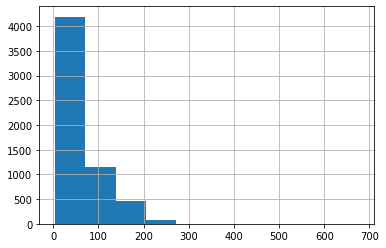

In [45]:
df_new['fire insurance'].hist()

In [46]:
print(df_new['total'].skew())
df_new['total'].describe()

24.8644980130198


count      5882.000000
mean       6150.218293
std        8868.503973
min         660.000000
25%        2496.000000
50%        4247.000000
75%        8216.750000
max      372700.000000
Name: total, dtype: float64

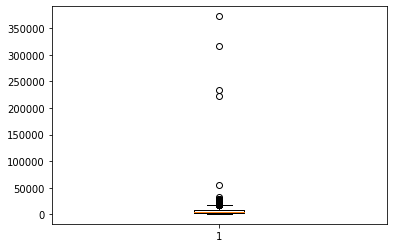

In [47]:
plt.boxplot(df_new['total'])
plt.show()

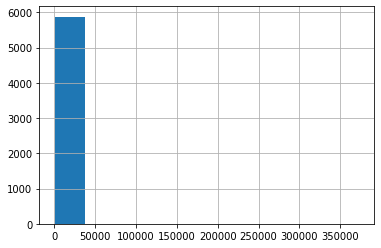

In [48]:
df_new.total.hist()

In [49]:
df_new.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa', 'rent amount', 'property tax',
       'fire insurance', 'total'],
      dtype='object')

In [51]:
print(df_new['hoa'].quantile(0.10))
print(df_new['hoa'].quantile(0.90))

0.0
2613.5


In [52]:
df_new['hoa'] = np.where(df_new['hoa'] <0.0, 0.0,df_new['hoa'])
df_new['hoa'] = np.where(df_new['hoa'] >2613.5, 2613.5,df_new['hoa'])
print(df_new['hoa'].skew())

0.7149928392771815


In [ ]:
###############

In [53]:
print(df_new['rent amount'].quantile(0.10))
print(df_new['rent amount'].quantile(0.90))

1220.0
10000.0


In [54]:
df_new['rent amount'] = np.where(df_new['rent amount'] <1220.0, 1220.0,df_new['rent amount'])
df_new['rent amount'] = np.where(df_new['rent amount'] >10000.0, 10000.0,df_new['rent amount'])
print(df_new['rent amount'].skew())

0.8663947370790815


In [ ]:
#############

In [55]:
print(df_new['property tax'].quantile(0.10))
print(df_new['property tax'].quantile(0.90))

0.0
1042.0


In [56]:
df_new['property tax'] = np.where(df_new['property tax'] <0.0, 0.0,df_new['property tax'])
df_new['property tax'] = np.where(df_new['property tax'] >1042.0, 1042.0,df_new['property tax'])
print(df_new['property tax'].skew())

1.1002506422322098


In [ ]:
###############

In [57]:
print(df_new['fire insurance'].quantile(0.10))
print(df_new['fire insurance'].quantile(0.90))

15.0
131.0


In [58]:
df_new['fire insurance'] = np.where(df_new['fire insurance'] <15.0, 15.0,df_new['fire insurance'])
df_new['fire insurance'] = np.where(df_new['fire insurance'] >131.0, 131.0,df_new['fire insurance'])
print(df_new['fire insurance'].skew())

0.8275091218833115


In [ ]:
############

In [59]:
print(df_new['total'].quantile(0.10))
print(df_new['total'].quantile(0.90))

1611.1999999999998
13000.0


In [60]:

df_new['total'] = np.where(df_new['total'] >13000.0, 13000.0,df_new['total'])
print(df_new['total'].skew())

0.7711472568065282


In [ ]:
##########

In [61]:
print(df_new['area'].quantile(0.10))
print(df_new['area'].quantile(0.90))

41.0
309.0


In [62]:
df_new['area'] = np.where(df_new['area'] <41.0, 41.0,df_new['area'])
df_new['area'] = np.where(df_new['area'] >309.0, 309.0,df_new['area'])
print(df_new['area'].skew())

0.7700902060812498


In [63]:
df_new.describe()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
count,5882.000000,5882.000000,5882.000000,5882.000000,5882.000000,5882.000000,5882.000000,5882.000000,5686.000000,5882.000000,5855.000000,5882.000000,5882.000000
mean,0.865352,135.546073,2.528052,2.377763,1.799728,7.483509,0.229004,0.739374,944.947679,4225.254845,306.063535,55.424685,5580.816729
std,0.341376,90.148899,1.124299,1.443171,1.615585,5.164871,0.420227,0.439013,866.445714,2874.778243,345.289046,38.536673,3804.999148
min,0.000000,41.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1220.000000,0.000000,15.000000,660.000000
25%,1.000000,60.000000,2.000000,1.000000,1.000000,4.000000,0.000000,0.000000,250.000000,1881.000000,35.000000,23.000000,2496.000000
50%,1.000000,100.000000,3.000000,2.000000,1.000000,7.000000,0.000000,1.000000,700.000000,3200.000000,158.000000,42.000000,4247.000000
75%,1.000000,200.000000,3.000000,3.000000,3.000000,9.000000,0.000000,1.000000,1500.000000,6000.000000,473.000000,79.000000,8216.750000
max,1.000000,309.000000,10.000000,10.000000,12.000000,99.000000,1.000000,1.000000,2613.500000,10000.000000,1042.000000,131.000000,13000.000000


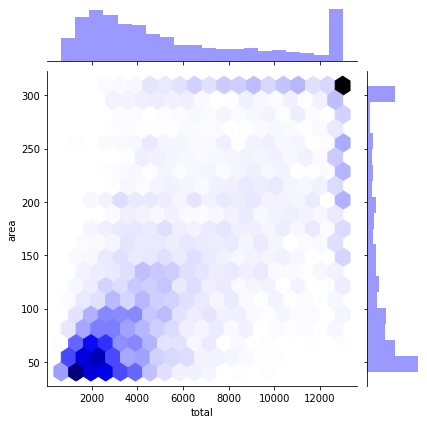

In [64]:
sns.jointplot(df_new['total'], df_new['area'], kind="hex", color="b")

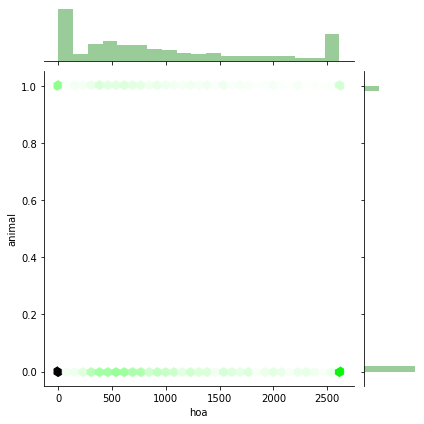

In [76]:
sns.jointplot(df_new['hoa'], df_new['animal'], kind="hex", color="g")

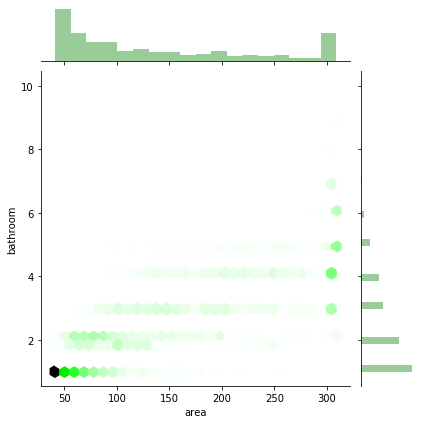

In [77]:
sns.jointplot(df_new['area'], df_new['bathroom'], kind="hex", color="g")